# Cournot Competition with and without Collusion


In this notebook, we examine a scenario with two firms operating under Cournot competition known from Micro II, Micro III and Industrial Organization. First, we solve the standard model, and afterwards we explore what happens when the model is extended so that the two firms collude.

## Cournot Competition

When firms compete in quantities, we have Cournot competition. In this notebook, we stick to the simplest setup with two firms, i.e. we have a duopoly. The two firms simultaneously decide their output, and since the two firms have market power, the chosen quantities will determine the price. Both firms seek to maximize their profit given the decision of the other firm. The Cournot model can be extended in different ways. In this notebook, we will look into what happens when firms collude, meaning that the two firms agree on a specific strategy.

## The Standard Model

### General Assumptions

The two firms produce a homogeneous product, and thus the consumers see them as perfect substitutes.

The two firms have the same costs, which are $c(q)$, meaning that the marginal costs are constant and equal to c, i.e. $mc = c$.

The two firms are facing the same overall demand from consumers.

The model consists of: the demand function, the profit functions and the reaction functions.

### The Demand Function

Firm 1 produces an amount equal to $q_1$, whereas firm 2 produces $q_2$. The total output in the economy is represented by the sum of each firm's individual supply, and is thus:

$$Q = q_1+q_2$$

The inverse linear demand function is given by

$$p = a - b(q_1+q_2)$$

where we see that more of both goods decreases the price. $a$ and $b$ are positive parameters.

### The Profit Function

The profit function is total revenue less total costs:

$$\pi_1=pq_1-cq_1$$

where $p$ is given above.

If we plug in the expression for $p$, we can rewrite the profit function:

$$\pi_1=[a-b(q_1+q_2)]q_1-cq_1$$

As the two firms are symmetric, the profit for firm 2 is equivalent.

Notice that the profit of firm 1 depends on the amount of goods firm 2 produces and vice versa.

### The Reaction Function

The reaction functions show how much each firm produces given the other firms output.

To find the reaction functions, we optimize the profit function for firm 1 with respect to the quantity $q_1$:

\begin{equation*}
\begin{aligned}
\frac{\partial \pi_1}{\partial q_1} = a -2bq_1-bq_2-c = 0
\end{aligned}
\end{equation*}

We solve for $q_1$ to get the reaction function of firm 1:

$$q_1(q_2)=\frac{1}{2}\left[\frac{(a-c)}{b}-q_2\right]$$

As the two firms are symmetric, firm 2's reaction function is equivalent.

Notice that the higher the quantity of firm 2, the lower the quantity of firm 1.

### Cournot-Nash Equilibrium

Solving the model gives us the Cournot-Nash equilibrium. Here, firm 1 produces the optimal amount of the quantity of firm 2 and vice verca.

To find the Cournot-Nash Equilibrium, we consider the two reaction functions. 

We plug in $q_2$ in $q_1$ and solve for $q_1$:

$$q_1 = \frac{1}{2}\left[\frac{(a-c)}{b}-\left[\frac{1}{2}\left[\frac{(a-c)}{b}-q_1\right]\right]\right]$$

And isolating $q_1$:

$$q_1=\frac{1}{3}\frac{(a-c)}{b}$$

As the two companies are symmetric, $q_2$ is:

$$q_2=\frac{1}{3}\frac{(a-c)}{b}$$

Which is the solution to the model. This gives us a price of:

$$p = a - b(\frac{1}{3}\frac{(a-c)}{b}+\frac{1}{3}\frac{(a-c)}{b}) = \frac{1}{3}a + \frac{2}{3}c$$

And a firm profit of:

$$\pi_i = pq_i-cq_i = \frac{(a + 2c)}{3}\frac{(a - c)}{3b} + c\frac{(a - c)}{3b} = \frac{a^2 + 4ac - 5c^2}{9b}$$

Now, we will solve the model using Python.

## Solving the Cournot Model with Python

First, we import the relevant libraries. We will be be solving the model both symbolically and numerically, meaning that we need the sympy library and elements from the scipy library. Furthermore, we need numpy when working with arrays, matplotlib and ipywidgets for graphs, and pandas for creating tables.

In [5]:
# Import libraries
from scipy import optimize,arange
import numpy as np
import ipywidgets as widgets
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import pandas as pd

## Symbolically

First, we define all the symbols and make sure that the results will look nice when printed.

In [6]:
# Define symbols
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
pi1 = sm.symbols('pi1')
pi2 = sm.symbols('pi2')
a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')

# For pretty printing
sm.init_printing(use_unicode=True)

Then we set up the inverse demand function.

In [7]:
# Define the inverse demand function
def p(q1,q2):
    return a-b*(q1+q2)

Then we define the cost function.

In [8]:
# Define the cost function
def cost(q,c):
    if q == 0:
        cost = 0
    else:
        cost = c*q
    return cost

And finally, the profit function.

In [9]:
# Define the profit function
def profit(q1,q2,c):
    return p(q1,q2)*q1 - cost(c,q1)

Now can differentiate to find the reaction functions. We see that they are the same as found in the section above.

In [10]:
# Differentiate profit wrt. q1 and q2, respectively
foc1 = sm.diff(profit(q1,q2,c),q1)
foc2 = sm.diff(profit(q2,q1,c),q2)
foc1

Finally, we can solve for the equilibrium output.

In [11]:
# Solve for equilibrium output
sm.solve([foc1, foc2], [q1, q2])

Which is equivalent to what we found in the theoretical section above.

## Numerically

Now, we solve the model numerically with the following parameter values: $a=2$, $b=1$ and $c=0$.

We again define all the functions, but this time as python variables, and since we are solving the model numerically now, we also define the demand parameters and the marginal costs.

In [12]:
# Define demand, costs and profit
def p(q1,q2):
    return a-b*(q1+q2)

def cost(q,c):
    if q == 0:
        cost = 0
    else:
        cost = c*q
    return cost

def profit(demand_function,cost_function,c,q1,q2):
    return demand_function(q1,q2)*q1-cost(q1,c)

a = 2
b = 1
c = 0

We then need to maximize profits in order to find the reaction function as shown in the theoretical section above. We will use scipy.optimize for this, and since this function is minimizing instead of maximizing, we add a minus in front.

In [13]:
# Define reaction functions by optimization
def reaction_function(q2,c):
    q1 =  optimize.fminbound(lambda x: -profit(p,cost,c,x,q2),0,1,full_output=1)
    return q1[0]

# TILFØJ NOGET HER OM HVAD VI GØR
def fixed_point(q,c):
    return [q[0]-reaction_function(q[1],c[0]),q[1]-reaction_function(q[0],c[1])]

# Set initial guess and solve by optimizing
initial_guess = [0,0]

solution = optimize.fsolve(lambda q: fixed_point(q,[0,0]), initial_guess)

print('Equilibrium output:',solution)

Equilibrium output: [0.66666667 0.66666667]


We see that in the Cournot-Nash equilibrium, where $a=2$, $b=1$ and $c=0$ we have that $q_1 = q_2 = 0.66666667$. 
Below we depict the Cournot-Nash equilibrium graphically:

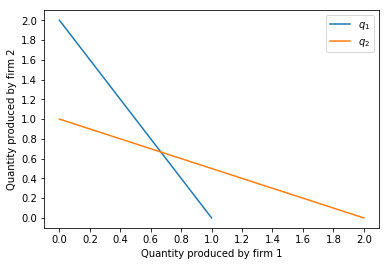

In [14]:
# Define reactions functions
def q1(q2,c,a,b):
    return 0.5*((a-c)/b-q2)

def q2(q1,c,a,b):
    return 0.5*((a-c)/b-q1)

# Create best response to multiple q values
range_q1 = np.linspace(0,2,10)
range_q2 = np.linspace(0,2,10)
q1 = q1(range_q2,c,a,b)
q2 = q2(range_q1,c,a,b)

# Plot q1 and q2
plt.plot(q1,range_q2, label = '$q_1$')
plt.plot(range_q1,q2, label = '$q_2$') #Notice here we have changed the x and y axis, to depict both graphs in the same diagram.
plt.xlabel('Quantity produced by firm 1')
plt.ylabel('Quantity produced by firm 2')
plt.xticks(np.arange(0, 2.1, step=0.2))
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.legend()

We see that the two reactions functions intersect at 0.67.

Let us also calculate the Cournot-Nash equilibrium output, price, profits, consumer surplus (CS) and total surplus (TS) in the case where $c=0$, $a=2$ and $b=1$:

In [15]:
# Define equilibrium output
q1_star = solution[0]
q2_star = solution[1]

# Calculate total output
Q_star = q1_star + q2_star

# Calculate equilibrium price
p_star = a-b*(q1_star+q2_star)

# Calculate profits
pi1_star = p_star*q1_star-c*q1_star
pi2_star = p_star*q2_star-c*q2_star

# Calculate consumer surplus
CS = Q_star*(a-p_star)/2

# Calculate total surplus
TS = pi1_star + pi2_star + CS

And now create a table that gives us an overview of the equilibrium values.

In [16]:
# Define results in dictionary
results = [{"Variable" : "$q_1^*$", "Value" : "%.2f" % q1_star},
           {"Variable" : "$q_2^*$", "Value" : "%.2f" % q2_star},
           {"Variable" : "$Q^*$", "Value" : "%.2f" % Q_star},
           {"Variable" : "$p^*$","Value" : "%.2f" % p_star},
           {"Variable" : "$\pi_1^*$", "Value" : "%.2f" % pi1_star},
           {"Variable" : "$\pi_2^*$", "Value" : "%.2f" % pi2_star},
           {"Variable" : "$CS$", "Value" : "%.2f" % CS},
           {"Variable" : "$TS$", "Value" : "%.2f" % TS}]

# Create dataframe
df = pd.DataFrame(results)

# Set index
df.set_index('Variable')

# Sort dataframe and show table
df = df[['Variable', 'Value']]

df

,Variable,Value
0,$q_1^*$,0.67
1,$q_2^*$,0.67
2,$Q^*$,1.33
3,$p^*$,0.67
4,$\pi_1^*$,0.44
5,$\pi_2^*$,0.44
6,$CS$,0.89
7,$TS$,1.78


## Graphical Illustration of Nash-Equilibrium with Changing Parameters
Below, the graphical illustration of the Cournot-Nash equilibrium is shown as before, but now the user has the option of changing the values of the parameters to investigate what happens to quantities.

We show this by making an interactive graph, where it is possible to change the values of $a$, $b$ and $c$ by using the sliders.  

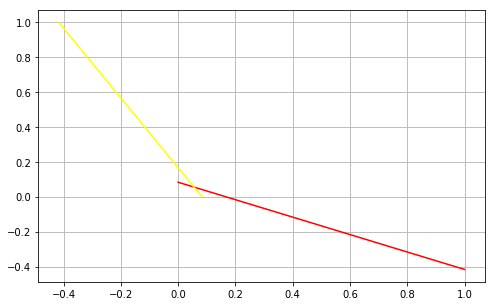

In [14]:
# Import relevant packages to create interactive graphs
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display

# Define the varibles to be interactive
def func(c,a,b):
    q1_interactive=0.5*((a-c)/b-q2) #Define q1
    plt.figure(figsize=(8,5))
    plt.plot(q2,q1_interactive,c='red')
    q2_interactive=(0.5*((a-c)/b-q1)) #Define q2
    plt.plot(q2_interactive,q1,c='yellow') #Notice we have changed the x and y axis compared to depicting q1
    plt.grid(True)
    plt.show()
    return (q1_interactive,q2_interactive)

# Create the interactive parameters
interactive_graph=interactive(func,a=(0.2,2.2,0.2),b=(0.2,2.2,0.2),
              c=(0,2,0.2))
display(interactive_graph)

This graph shows all others equals:

* when $c$ decreases (increases), the optimal quantities increases (decreases). 
* when $a$ decreases (increases), the optimal quantities increases (decreases). 
* when $b$ increases (decreases), the optimal quantities decreases (increases). 


**Et eller andet sted, skal vi have defineret betingelserne for c, $0 \leq c<a$**

## Cournot Competition with Collusion

We will now look at the situation where the two firms collude on some amounts $q_1$ and $q_2$. Again, we assume symmetric firms.

When we have a duopoly with symmetric firms, it is optimal for the two firms is to maximize their joint profit, when colluding, i.e. the industry profit. They can do this by maximizing the profit as if there was one monopoly firm and then split the market in two and act like a monopolist supplier in their own part of the market.

The industry profit is given by the joint inverse demand function:
$$p(Q)=a-b*Q$$
Industry profit:
$$\pi_M=p(Q)*Q-c*Q$$

Plug in $p(Q)$ and solve for differentiate wrt. Q:
$$\pi_M=(a-b*Q)*Q-c*Q$$
\begin{equation*}
\begin{aligned}
\frac{\partial \pi_M}{\partial Q} = a -2bQ-c = 0
\end{aligned}
\end{equation*}
Solve for $Q$:
$$Q=\frac{a-c}{2b}$$

Thereby, the total output in the economy is established. As the two companies will share the total output between them, each companies quantity is given by:
$$q_1=q_2=\frac{a-c}{4b}$$
$$q_1=q_2=\frac{1}{2}\left{\frac{a-c}{2b}\right}$$


## Solving the Collusion model in Python
Now let us solve the Cournot competition model with collusion in python.

To find the equilibrium output in this situation, we first maximize industry profit using sympy.

In [15]:
# Define symbols
Q = sm.symbols('Q')
p = sm.symbols('p')
pi = sm.symbols('pi')

a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')

# For pretty printing
sm.init_printing(use_unicode=True)

# Define inverse demand function
def p(Q):
    return a-b*Q

# Define cost function
def cost(Q,c):
    if Q == 0:
        cost = 0
    else:
        cost = c*Q
    return cost

# Define industry profits
def industry_profit(p,c,Q):
    return p(Q)*Q-cost(Q,c)

# Optimize industry profits wrt. Q:
foc = sm.diff(industry_profit(p,c,Q),Q)

# Solve FOC for Q:
solve = sm.solve([foc], [Q])
solve

We now have the solution for the industry output. Since we have idenitical firms, they will split the amount in two. We now find that amount by turning the symbols into a python function and using the same parameters as earlier.

In [16]:
_monopoly_output = sm.lambdify((Q,a,b,c), solve, 'numpy')

def monopoly_output(Q,a,b,c):
    return _monopoly_output(Q,a,b,c)

a = 2
b = 1
c = 0

Q = monopoly_output(Q,a,b,c)
Q

The total output is thus 1, meaning that each firm produces $q_1 = q_2 = 0.5$.

We can now compute the rest of the equilibrium values.

In [17]:
for i in Q.values():
    float(i)
Q_M = i

q1_M = Q_M/2
q2_M = Q_M/2

p_M = a-b*Q_M

pi1_M = p_M*q1_M-c*q1_M
pi2_M = p_M*q2_M-c*q2_M

pi = p_M*Q_M - c*Q_M

CS_M = Q_M*(a-p_M)/2

TS_M = pi1_M + pi2_M + CS_M

In [18]:
# Setting up results in overview table:
results = [{"Variable" : "$q_1^*$", "Value" : "%.2f" % q1_star},
           {"Variable" : "$q_1^M$", "Value" : "%.2f" % q1_M},
           {"Variable" : "$q_2^*$", "Value" : "%.2f" % q2_star},
           {"Variable" : "$q_2^M$", "Value" : "%.2f" % q2_M},
           {"Variable" : "$Q^*$", "Value" : "%.2f" % Q_star},
           {"Variable" : "$Q^M$", "Value" : "%.2f" % Q_M},
           {"Variable" : "$p^*$","Value" : "%.2f" % p_star},
           {"Variable" : "$p^M$","Value" : "%.2f" % p_M},
           {"Variable" : "$\pi_1^*$", "Value" : "%.2f" % pi1_star},
           {"Variable" : "$\pi_1^M$", "Value" : "%.2f" % pi1_M},
           {"Variable" : "$\pi_2^*$", "Value" : "%.2f" % pi2_star},
           {"Variable" : "$\pi_2^M$", "Value" : "%.2f" % pi2_M},
           {"Variable" : "$CS$", "Value" : "%.2f" % CS},
           {"Variable" : "$CS^M$", "Value" : "%.2f" % CS_M},
           {"Variable" : "$TS$", "Value" : "%.2f" % TS},
           {"Variable" : "$TS^M$", "Value" : "%.2f" % TS_M}]

df = pd.DataFrame(results)

df.set_index('Variable')

df = df[['Variable', 'Value']]

df

,Variable,Value
0,$q_1^*$,0.67
1,$q_1^M$,0.50
2,$q_2^*$,0.67
3,$q_2^M$,0.50
4,$Q^*$,1.33
5,$Q^M$,1.00
6,$p^*$,0.67
7,$p^M$,1.00
8,$\pi_1^*$,0.44
9,$\pi_1^M$,0.50


## A Prisoners Dilemma Game

From these parameters it is clear that the two companies can increase their profits by colluding. The quantity sold when colluding will decrease, but as they are able to agree on a higher price, they are actually able to gain from this "partnership". 
A clever micro-economist will know though, that collusion will not sustain. Each company can through deviating slightly increase their profit, and hence they would do so, ending up in the non-collusive equilibrium. This is a great example of a prisioner dilemma. 

Let us calculate the profits when one of the firms choose to deviate, here firm 1.

We find the optimal quantity to produce, when firm 1 knows firm 2 will produce the collusion quantity. We can use the same reaction function as we found earlier:

In [27]:
# Use the reaction function to determine optimal deviating quantity:
q1_dev = 0.5*((a-c)/b-q2_M)
              
# Price when one firm deviates:
p_dev = a-b*(q1_dev+q2_M)
              
# The profit for the deviating firm:
pi_dev = p_dev*q1_dev - c*q1_dev

# The profit for the collusive firm when the other firm deviates:
pi_non = p_dev*q2_M - c*q2_M

print(q1_dev, pi_dev, pi_non)


0.75 0.5625 0.375


Now we will look at these results in a game matrix:

\begin{equation*}
    \text{Firm 1}  \ \ \ \  \begin{matrix}
     & \text{Firm 2} &  \\
    & \text{Colluding} & \text{Deviating} \\
    \text{Colluding} & 0.50,0.50 & 0.38,0.56 \\
    \text{Deviating} & 0.56, 0.38 & 0.44,0.44
    \end{matrix}
\end{equation*}

The optimal choice for firm 1, when firm 2 colludes is to deviate and gain a profit of 0.56. The optimal choice for firm 1 when firm 2 deviates is to deviate, gaining a profit of 0.44. The same arguments goes for firm 2, hence the Nash-equilibrium is where both firms are deviating, thereby both firms get the profit of 0.44, even though they could have gained more by both colluding, 0.50. A true prisoners dilemma. 